<a href="https://colab.research.google.com/github/tsengs0/chipathon2024_SaltyChip/blob/chipathon2024_saltychip/openfasoc/generators/glayout/glayout/flow/blocks/transmission_gate_saltychip/tg_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chipathon2024　SaltyChip Group
##テグさんのトランスミッションゲートをnotebbokで表示されるようにしてみた。
最初にOpenFASoCをクーロンして、sky130、gf180、gdsfactoryをインストールします。
micromambaを使ったバイナリ依存klayoutをインストールします。



*   Chipathon2024 GitHub:
https://github.com/sscs-ose/sscs-ose-chipathon.github.io







In [4]:
# Setup the environment for the OpenFASOC GDSFactory generator
# You only need to run this block once!

# Clone OpenFASoC
!git clone https://github.com/idea-fasoc/OpenFASOC
# Install python dependencies
!pip install sky130
!pip install gf180 prettyprinttree svgutils
!pip install gdsfactory==7.7.0

import pathlib
import os
# Install KLayout (via conda)
!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}

!bin/micromamba create --yes --prefix $CONDA_PREFIX
# Install from the litex-hub channel
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        klayout

Cloning into 'OpenFASOC'...
remote: Enumerating objects: 16501, done.
remote: Counting objects: 100% (3739/3739), done.
remote: Compressing objects: 100% (549/549), done.
remote: Total 16501 (delta 3311), reused 3398 (delta 3185), pack-reused 12762 (from 1)
Receiving objects: 100% (16501/16501), 410.32 MiB | 20.14 MiB/s, done.
Resolving deltas: 100% (10104/10104), done.
Updating files: 100% (1849/1849), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.9/631.9 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pydantic-settings to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pydantic-settings to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 834.2/834.2 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.9/533.9 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.9/394.9 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.6 MB/s eta 0:00:00
   ━

 klayoutバイナリをシステムパスに追加し、GLayoutディレクトリに移動します。
（カーネルを再起動する度に実行する必要があります。）




In [5]:
# Setup the environment for the OpenFASOC GDSFactory generator

# Adding micro-mamba binary directory to the PATH
# This directory contains Klayout
import pathlib
import os
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())

%env CONDA_PREFIX={CONDA_PREFIX}
# Add conda packages to the PATH
PATH = os.environ['PATH']
%env PATH={PATH}:{CONDA_PREFIX}/bin

%cd /content/OpenFASOC/openfasoc/generators/glayout


env: CONDA_PREFIX=/content/conda-env
env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/conda-env/bin:/content/conda-env/bin
/content/OpenFASOC/openfasoc/generators/glayout


# cell_config.py

In [6]:
from typing import ClassVar, Optional, Any, Union, Literal, Iterable, TypedDict
#from glayout.flow.pdk.gf180_mapped import gf180
from glayout.flow.pdk.sky130_mapped import sky130_mapped_pdk as sky130
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.pdk.util.comp_utils import evaluate_bbox
from gdsfactory import Component
from gdsfactory.components import rectangle
from glayout.flow.primitives.fet import pmos
from glayout.flow.primitives.fet import nmos
from glayout.flow.routing.straight_route import straight_route
from glayout.flow.routing.c_route import c_route
from glayout.flow.routing.L_route import L_route
from glayout.flow.routing.smart_route import smart_route
from glayout.flow.placement.two_transistor_interdigitized import two_nfet_interdigitized
from glayout.flow.placement.two_transistor_interdigitized import two_pfet_interdigitized
from glayout.flow.pdk.util.comp_utils import prec_ref_center, movey, evaluate_bbox, align_comp_to_port

def add_port_lvs(pdk: MappedPDK, comp: Component, port_list: list[ dict[str, Union[float, str]] ]) -> Component:
	'''
    To add external I/O ports onto the cell for LVS

	@ args:
    	# pdk: please refer to the glayout library
    	# comp: please refer to the glayout library
    	# port_list: tuple[ dict[str, Union[float, str]] ] specifying new port's corresponding pin size, and
					 the name of new port and exiting port managed to align with in the given
					 component, e.g.
					 	(
							{
								"new_port": "drain_new",
								"new_port_label": "drain_new_label",
								"pin_width": 0.5,
								"pin_height": 0.5,
								"ref_port": "multiplier_0_drain_E"
							},
							{
								"new_port": "source_new",
								"new_port_label": "source_new_label",
								"pin_width": 1.5,
								"pin_height": 1.5,
								"ref_port": "multiplier_0_source_E"
							}
						)

		# return: gdsfactory.Component

	@ Limitations:
		# So far, only skywater130 process is validated
	'''

	# Add pins and text labels for LVS
	pins_labels_info = list() # list that contains all port and component information
	print(f"port_list: {port_list}")
	for port in port_list:
		# To get the layer's data type mapped to the GDS
		ref_port_layer = comp.ports[ port["ref_port"] ].layer[0] # [0]: layer mapping, [1]: pin, drawing, label, net, etc.

		# To create the pin w/ label where the layer[1] is mapped to 16
		new_port_pin = rectangle(layer=(ref_port_layer, 16), size=(port["pin_width"], port["pin_height"]),centered=True).copy() # True set rectangle's centroid to the relative (0, 0)
		new_port_pin.add_label(text=port["new_port_label"], layer=(ref_port_layer, 5)) # layer[1]=5 mapped to the "label" datatype in the GDS

		# To align the new port with the designated port existing in the given component
		alignment = ('c', 'b')
		comp_ref = align_comp_to_port(new_port_pin, comp.ports[ port["ref_port"] ], alignment=alignment)
		comp.add(comp_ref)

	return comp



# inv_lib.py

In [7]:
#from glayout.flow.pdk.gf180_mapped import gf180
from glayout.flow.pdk.sky130_mapped import sky130_mapped_pdk as sky130
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.pdk.util.comp_utils import prec_ref_center, movex, movey, evaluate_bbox, align_comp_to_port
from gdsfactory import Component
from gdsfactory.components import rectangle
from glayout.flow.primitives.fet import pmos
from glayout.flow.primitives.fet import nmos
from glayout.flow.routing.straight_route import straight_route
from glayout.flow.routing.c_route import c_route
from glayout.flow.routing.L_route import L_route
from glayout.flow.routing.smart_route import smart_route

def reconfig_inv(pdk: MappedPDK, component_name, pmos_width, pmos_length, nmos_width, nmos_length, orientation):
	# Create a top level component
	top_level = Component(component_name)
	# To prepare one PMOS and one NMOS for the subsequent inverter cell construction
	pfet = pmos(pdk=pdk, with_substrate_tap=False, with_dummy=(False, True), width=pmos_width, length=pmos_length)
	nfet = nmos(pdk=pdk, with_substrate_tap=False, with_dummy=(True, False), width=nmos_width, length=nmos_length)

	# Instantiation of above PMOS and NMOS under the top level
	pfet_ref = prec_ref_center(pfet)
	nfet_ref = prec_ref_center(nfet)
	top_level.add(pfet_ref)
	top_level.add(nfet_ref)

	# Placement (relative move)
	mos_spacing = pdk.util_max_metal_seperation()
	if(orientation=="horizontal"):
		pfet_ref.rotate(90)
		nfet_ref.rotate(90)
	else:
		pass
	pfet_ref.movey(evaluate_bbox(nfet)[1] + mos_spacing)

	# Routing
	top_level << smart_route(pdk, pfet_ref.ports["multiplier_0_drain_E"], nfet_ref.ports["multiplier_0_drain_E"])
	top_level << smart_route(pdk, pfet_ref.ports["multiplier_0_gate_W"], nfet_ref.ports["multiplier_0_gate_W"])

	# To add the ports
	top_level.add_ports(pfet_ref.get_ports_list(), prefix="pmos_")
	top_level.add_ports(nfet_ref.get_ports_list(), prefix="nmos_")

	return top_level

# transmission_gate.py

In [13]:
from typing import ClassVar, Optional, Any, Union, Literal, Iterable, TypedDict
#from glayout.flow.pdk.gf180_mapped import gf180
from glayout.flow.pdk.sky130_mapped import sky130_mapped_pdk as sky130
from glayout.flow.pdk.mappedpdk import MappedPDK
from glayout.flow.pdk.util.comp_utils import evaluate_bbox
from gdsfactory import Component
from gdsfactory.components import rectangle
from glayout.flow.primitives.fet import pmos
from glayout.flow.primitives.fet import nmos
from glayout.flow.routing.straight_route import straight_route
from glayout.flow.routing.c_route import c_route
from glayout.flow.routing.L_route import L_route
from glayout.flow.routing.smart_route import smart_route
from glayout.flow.placement.two_transistor_interdigitized import two_nfet_interdigitized
from glayout.flow.placement.two_transistor_interdigitized import two_pfet_interdigitized
from glayout.flow.pdk.util.comp_utils import prec_ref_center, movey, evaluate_bbox, align_comp_to_port

# My own cell library
#from inv_lib import reconfig_inv
#import cell_config as config

def naive_tg_cell(pdk: MappedPDK, flip_config: dict[str, Union[int, str]], pmos_width, pmos_length, nmos_width, nmos_length):
	# To prepare all necessary cells to construct a transmission gate, i.e.
	# 1) PMOS
	# 2) NMOS
	pfet = pmos(pdk=pdk, with_substrate_tap=False, with_dummy=(True, False), width=pmos_width, length=pmos_length)
	nfet = nmos(pdk=pdk, with_substrate_tap=False, with_dummy=(False, True), width=nmos_width, length=nmos_length)

	# Placement and adding ports
	top_level = Component(name="TG")
	pfet_ref = prec_ref_center(pfet)
	nfet_ref = prec_ref_center(nfet)
	top_level.add(pfet_ref)
	top_level.add(nfet_ref)

	# Placement
	mos_spacing = pdk.util_max_metal_seperation()
	#mos_spacing = pdk.get_grule("met1")["min_width"])
	if flip_config["degree"] != None:
		pfet_ref.rotate(flip_config["degree"])
		nfet_ref.rotate(flip_config["degree"])
	pfet_ref.movey(evaluate_bbox(nfet)[1] + mos_spacing)

	# Routing
	# To simplify the routing for the parallel-gate transistors, the layout is realised as follow which is expected to be equivalent to a TG
	#     a) PMOS.source connected to NMOS.source
	#     b) PMOS.drain connected to NMOS.drain
	top_level << smart_route(pdk, pfet_ref.ports["multiplier_0_source_E"], nfet_ref.ports["multiplier_0_source_E"]) # "in" of the TG
	top_level << smart_route(pdk, pfet_ref.ports["multiplier_0_drain_W"], nfet_ref.ports["multiplier_0_drain_E"]) # "out" of the TG

	top_level.add_ports(pfet_ref.get_ports_list(), prefix="pmos_")
	top_level.add_ports(nfet_ref.get_ports_list(), prefix="nmos_")
	#top_level.add_port(
	#	name="", center=[0, width / 2], width=width, orientation=180, layer=layer
	#)

	# Add pins and text labels for LVS
	pins_labels_info = list() # list that contains all port and component information
	# To define the layers
	gds_met1 = pdk.get_glayer("met2")[0]
	gds_met2 = gds_met1+1
	gds_met3 = gds_met2+1
	gds_met4 = gds_met3+1
	gds_met5 = gds_met4+1
	# To get the respective layers of the underlying TG's PMOS.source port PMOS.drain port
	tg_din_portLayer = top_level.ports["pmos_multiplier_0_source_W"].layer[0]
	tg_dout_portLayer = top_level.ports["pmos_multiplier_0_drain_E"].layer[0]
	# To create the pins w/ labels and append to info list
	tg_din_pin = rectangle(layer=(tg_din_portLayer, 16), size=(1, 1),centered=True).copy() # True set rectangle's centroid to the relative (0, 0)
	tg_dout_pin = rectangle(layer=(tg_dout_portLayer, 16), size=(1, 1), centered=True).copy()
	tg_din_pin.add_label(text="Vin", layer=(tg_din_portLayer, 5))
	tg_dout_pin.add_label(text="Vout", layer=(tg_dout_portLayer, 5))
	pins_labels_info.append((tg_din_pin, top_level.ports["pmos_multiplier_0_source_W"], None))
	pins_labels_info.append((tg_dout_pin, top_level.ports["pmos_multiplier_0_drain_E"], None))

	#print(top_level.ports["pmos_multiplier_0_source_W"].name)
	#top_level.pprint_ports()

	# Move everythin to position
	for comp, prt, alignment in pins_labels_info:
		alignment = ('c', 'b') if alignment is None else alignment
		compref = align_comp_to_port(comp, prt, alignment=alignment)
		#top_level.add(compref)

	return top_level #top_level.flatten()

def tg_with_inv(pdk: MappedPDK, pmos_width, pmos_length, nmos_width, nmos_length):
	# To prepare all necessary cells to construct a transmission gate, i.e.
	# 1) transmission gate
	# 2) Inverter
	tg = naive_tg_cell(pdk=pdk, flip_config={"degree": 270}, pmos_width=pmos_width, pmos_length=pmos_length, nmos_width=nmos_width, nmos_length=nmos_length)
	inv = reconfig_inv(pdk=pdk, component_name="gate_ctrl_inv", pmos_width=pmos_width, pmos_length=pmos_length, nmos_width=nmos_width, nmos_length=nmos_length, orientation="horizontal")

	# Instantiation of the essential cells
	top_level = Component(name="tg_with_inv")
	tg_ref = prec_ref_center(tg)
	inv_ref = prec_ref_center(inv)
	top_level.add(tg_ref)
	top_level.add(inv_ref)

	# Placement
	mos_spacing = pdk.util_max_metal_seperation()
	nwell_min_spacing = pdk.get_grule("nwell")["min_separation"]
	inv_cell_width = inv_ref.xsize # or = evaluate_bbox(inv)[0]
	tg_ref.movex(inv_cell_width + nwell_min_spacing)

	# Routing
	#    1) PMOS of the TG is switched on/off by the inverter's output
	#    2) NMOS of the TG is switched on/off by an external control signal connected to inverter's input port as well
	top_level << smart_route(pdk, inv_ref.ports["pmos_multiplier_0_drain_E"], tg_ref.ports["pmos_multiplier_0_gate_W"])
	top_level << smart_route(pdk, inv_ref.ports["nmos_multiplier_0_gate_S"], tg_ref.ports["nmos_multiplier_0_gate_S"])

	# Adding the ports
	top_level.add_ports(tg_ref.get_ports_list(), prefix="tg_")
	top_level.add_ports(inv_ref.get_ports_list(), prefix="inv_")

	return top_level


# eval.py

<ipython-input-25-75613231af01>:51: UserWarning: Unnamed cells, 7 in 'tg_with_inv$6'
  tg_inst.write_gds("tg_with_inv.gds")
2024-11-14 02:40:11.852 | INFO     | gdsfactory.component:_write_library:1851 - Wrote to 'tg_with_inv.gds'


port_list: [{'new_port': 'tg_ctrl', 'new_port_label': 'ctrl', 'pin_width': 0.33, 'pin_height': 0.33, 'ref_port': 'inv_nmos_multiplier_0_gate_S'}, {'new_port': 'tg_din', 'new_port_label': 'din', 'pin_width': 0.3, 'pin_height': 0.3, 'ref_port': 'tg_pmos_multiplier_0_source_W'}, {'new_port': 'tg_dout', 'new_port_label': 'dout', 'pin_width': 0.3, 'pin_height': 0.3, 'ref_port': 'tg_nmos_multiplier_0_drain_N'}]


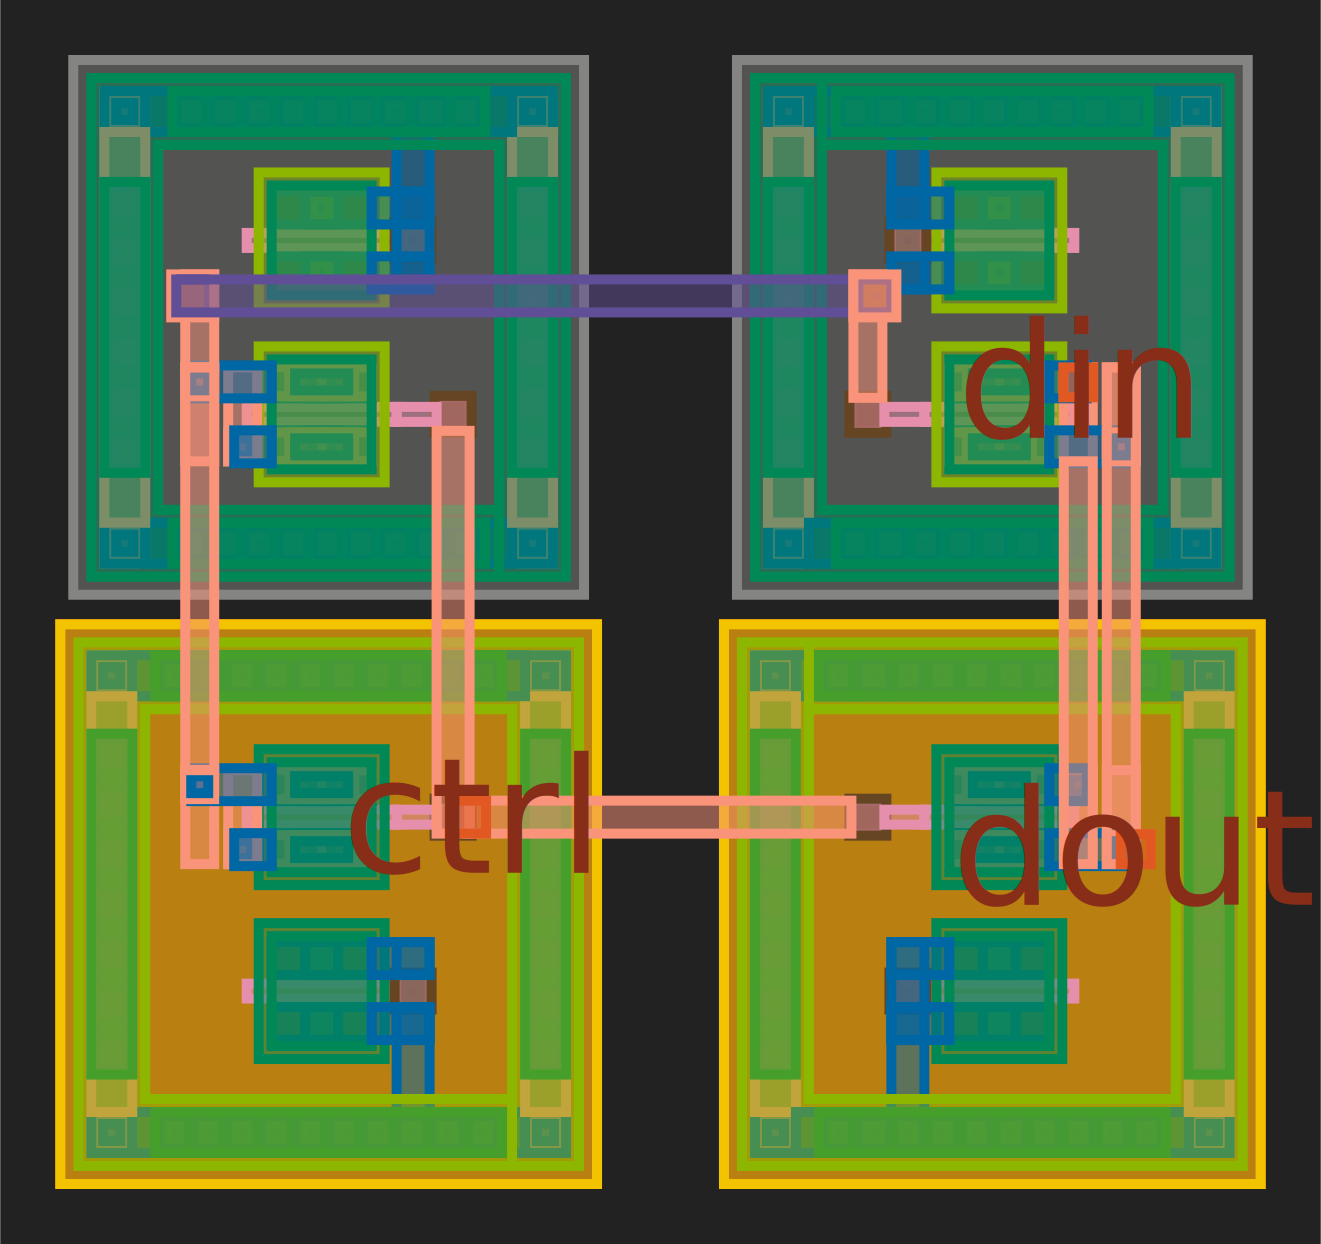

In [25]:
#from glayout.flow.pdk.gf180_mapped import gf180
from glayout.flow.pdk.sky130_mapped import sky130_mapped_pdk as sky130
import gdstk
import svgutils.transform as sg
import IPython.display
from IPython.display import clear_output

def display_gds(gds_file, image_filename: str, scale = 3):
  # Generate an SVG image
  top_level_cell = gdstk.read_gds(gds_file).top_level()[0]
  top_level_cell.write_svg(image_filename)
  # Scale the image for displaying
  fig = sg.fromfile(image_filename)
  fig.set_size((str(float(fig.width) * scale), str(float(fig.height) * scale)))
  fig.save(image_filename)

  # Display the image
  IPython.display.display(IPython.display.SVG(image_filename))

def main():
  tg_inst = tg_with_inv(pdk=sky130, pmos_width=1, pmos_length=0.15, nmos_width=1, nmos_length=0.15)
  tg_inst = add_port_lvs(
      pdk=sky130,
      comp=tg_inst,
      port_list=[
          {
              "new_port": "tg_ctrl",
              "new_port_label": "ctrl",
              "pin_width": tg_inst.ports["inv_nmos_multiplier_0_gate_S"].width,
              "pin_height": tg_inst.ports["inv_nmos_multiplier_0_gate_S"].width,
              "ref_port": "inv_nmos_multiplier_0_gate_S"
          },
          {
              "new_port": "tg_din",
              "new_port_label": "din",
              "pin_width": 0.3,
              "pin_height": 0.3,
              "ref_port": "tg_pmos_multiplier_0_source_W"
          },
          {
              "new_port": "tg_dout",
              "new_port_label": "dout",
              "pin_width": 0.3,
              "pin_height": 0.3,
              "ref_port": "tg_nmos_multiplier_0_drain_N"
          }
	    ]
	)
  #tg_inst.flatten()
  #tg_inst.show()
  tg_inst.write_gds("tg_with_inv.gds")
  display_gds(gds_file="tg_with_inv.gds", image_filename="tg_with_inv.svg", scale=5)

if __name__ == "__main__":
    main()



---


# トランスミッションゲートを表示させます。


Geminiによると・・・
生成されたGDSファイルに名前のないセルがあるという警告が表示されているようです。この警告はgdsfactoryから発生し、「TG$2」セル内に明示的な名前が割り当てられていないコンポーネントがあることを示しています。

すぐに問題が発生するわけではありませんが、整理とデバッグを改善するために、すべてのコンポーネントに名前を付けることをお勧めします。コンポーネントを作成するときに name 引数を指定することで、コンポーネントに名前を付けることができます。

たとえば、transmissionGate_cell 関数では、pfet および nfet インスタンスに名前を付けることができます。


pfet = pmos(pdk=pdk, with_substrate_tap=False, with_dummy=(False, False), width=width, length=length, name="pmos_instance")
nfet = nmos(pdk=pdk, with_substrate_tap=False, with_dummy=(False, False), width=width, length=length, name="nmos_instance")
Use code with caution
これにより、GDSファイルがより読みやすくなり、扱いやすくなります。

・・・らしいです